### 목표 : 많은 특성의 데이터셋에서 과대적합 해결
- 데이터 : perch3.csv
- 피쳐 : Length, Height, Width
- 타겟 : Weight
- [조건]
    * 특성 추가 => degree = 5로 설정
    * 특성을 기반으로 무게 예측 => 지도학습 + 회귀

In [180]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression, Lasso
import heejin

In [181]:
perchDF = pd.read_csv('../data/perch3.csv')
perchDF.head()

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415


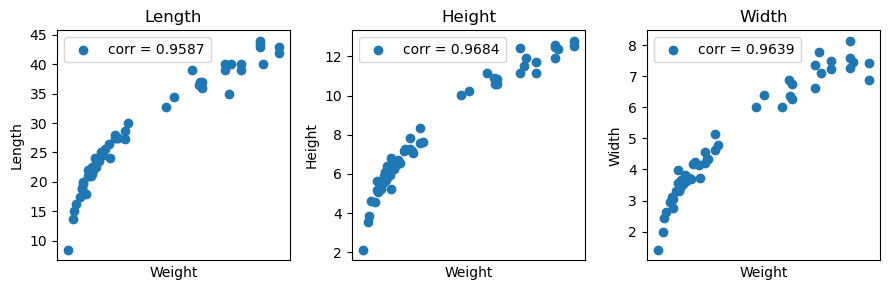

In [182]:
plt.figure(figsize=(9,3))
heejin.print_scatter(1,3,perchDF['Weight'],perchDF[perchDF.columns[1:]]) 
#직선의 형태는 아니지만 곡선의 양의 방향/비례하는 분포 확인

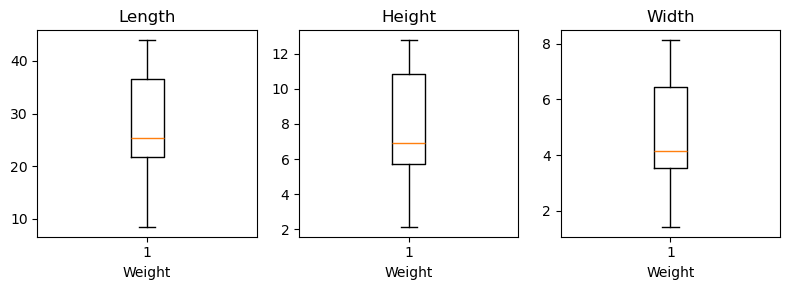

In [183]:
plt.figure(figsize=(8,3))
heejin.print_box(1,3,perchDF['Weight'],perchDF[perchDF.columns[1:]])

In [184]:
targetSR = perchDF['Weight']
featureDF = perchDF[perchDF.columns[1:]]

In [185]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly_feature = poly.fit_transform(featureDF)

In [186]:
poly.get_feature_names_out()  # 만들어진 피쳐 확인

array(['Length', 'Height', 'Width', 'Length^2', 'Length Height',
       'Length Width', 'Height^2', 'Height Width', 'Width^2', 'Length^3',
       'Length^2 Height', 'Length^2 Width', 'Length Height^2',
       'Length Height Width', 'Length Width^2', 'Height^3',
       'Height^2 Width', 'Height Width^2', 'Width^3', 'Length^4',
       'Length^3 Height', 'Length^3 Width', 'Length^2 Height^2',
       'Length^2 Height Width', 'Length^2 Width^2', 'Length Height^3',
       'Length Height^2 Width', 'Length Height Width^2', 'Length Width^3',
       'Height^4', 'Height^3 Width', 'Height^2 Width^2', 'Height Width^3',
       'Width^4', 'Length^5', 'Length^4 Height', 'Length^4 Width',
       'Length^3 Height^2', 'Length^3 Height Width', 'Length^3 Width^2',
       'Length^2 Height^3', 'Length^2 Height^2 Width',
       'Length^2 Height Width^2', 'Length^2 Width^3', 'Length Height^4',
       'Length Height^3 Width', 'Length Height^2 Width^2',
       'Length Height Width^3', 'Length Width^4', 'Height^5

In [187]:
xtrain,xtest,ytrain,ytest = train_test_split(poly_feature,targetSR,test_size=0.2,random_state=5)

In [188]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)
xtest_scaled = scaler.transform(xtest)

In [189]:
lr_model = LinearRegression()

lr_model.fit(xtrain_scaled,ytrain)
lr_model.score(xtrain_scaled,ytrain),lr_model.score(xtest_scaled,ytest)  # 완벽한 과대적합

(1.0, -44.324149470735115)

### 규제 : 가중치 값을 조절해서 과대적합 문제 해결
- Ridge : 모든 피쳐에 가중치를 0에 가깝게 조절 가능
- Lasso : 특정 피쳐의 가중치를 0으로 해서 차원 축소의 의미를 부여

[규제 1] Ridge

In [190]:
model1 = Ridge()

model1.fit(xtrain_scaled,ytrain)
model1.score(xtrain_scaled,ytrain),model1.score(xtest_scaled,ytest)

(0.9876671826928424, 0.9906574581022114)

In [191]:
# 모델 파라미터 확인
model1.n_iter_, model1.coef_, model1.intercept_
# None(계산방식 지정안하면 None 반환) / 각 피쳐마다 존재 / 하나만 존재

(None,
 array([ 2.57445056e+00, -7.70896243e+00,  9.95607301e+00,  1.63584204e+01,
         1.18239313e+01,  1.68452710e+01,  9.08588715e+00,  1.44485823e+01,
         2.46589517e+01,  1.88332690e+01,  1.67448150e+01,  1.46890767e+01,
         1.55758822e+01,  1.36494585e+01,  1.63946235e+01,  1.52040775e+01,
         1.36132850e+01,  1.69567491e+01,  2.50344631e+01,  1.43243600e+01,
         1.38954585e+01,  6.16832056e+00,  1.39859424e+01,  6.16139336e+00,
         2.83087818e+00,  1.45216370e+01,  6.79935422e+00,  3.82911737e+00,
         5.65963185e+00,  1.54400844e+01,  8.03012292e+00,  5.61910860e+00,
         8.22732446e+00,  1.56048040e+01,  5.73372730e+00,  6.65482548e+00,
        -6.07806229e+00,  7.87609462e+00, -5.16795627e+00, -1.38846438e+01,
         9.34085686e+00, -3.82925412e+00, -1.24361273e+01, -1.62806755e+01,
         1.09991310e+01, -2.09442499e+00, -1.03902487e+01, -1.36920655e+01,
        -1.20547482e+01,  1.28068944e+01,  7.27293690e-03, -7.76350558e+00,
     

In [192]:
# 최적의 규제 강도 설정 값 찾기
alphas = [0.1,1.0,10.0,20.,30.]
ridge_score = [[],[]] # train_score , test_score
for a in alphas:
    model1 = Ridge(alpha = a)

    model1.fit(xtrain_scaled,ytrain)
    ridge_score[0].append(model1.score(xtrain_scaled,ytrain))
    ridge_score[1].append(model1.score(xtest_scaled,ytest))

In [193]:
best_alpha = alphas[ridge_score[1].index(max(ridge_score[1]))]

Text(0.5, 1.0, '[Train & Test]')

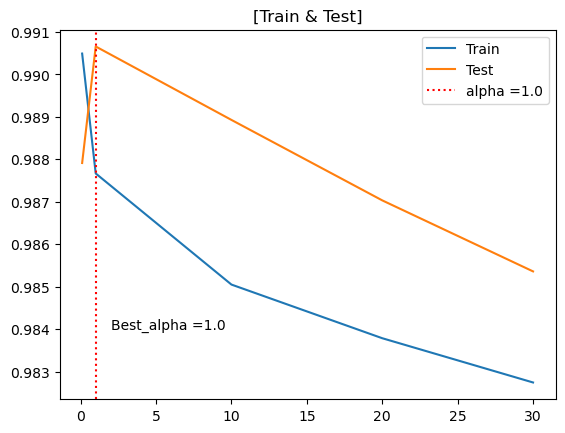

In [194]:
plt.plot(alphas,ridge_score[0], label = 'Train')
plt.plot(alphas,ridge_score[1], label = 'Test')
plt.axvline(best_alpha, color = 'red', linestyle = ':', label = f'alpha ={best_alpha}')
plt.text(best_alpha+1,0.984,f'Best_alpha ={best_alpha}')
plt.legend()
plt.title('[Train & Test]')

[규제 2] Lasso

In [195]:
model2 = Lasso(random_state=5,max_iter=10000)

model2.fit(xtrain_scaled,ytrain)
model2.score(xtrain_scaled,ytrain),model2.score(xtest_scaled,ytest)

(0.9868623814014844, 0.9906277023627712)

In [196]:
# 모델 파라미터 확인
model1.n_iter_, model1.coef_, model1.intercept_ # 0인 값 존재 # 계수가 0인 피쳐는 영향을 못 줌

(None,
 array([11.86143406, 11.25959328, 10.54701009, 10.61038926, 10.38829742,
         9.50063179, 10.18284578,  9.3449014 ,  8.60253355,  8.86267873,
         8.81195912,  7.75045726,  8.78064873,  7.74578102,  6.84124911,
         8.76290508,  7.76228502,  6.89982767,  6.20021811,  6.95995083,
         7.02521896,  5.78981982,  7.10889927,  5.88629512,  4.80889468,
         7.20501773,  6.00398917,  4.95404264,  4.08172458,  7.30764427,
         6.13700948,  5.12319846,  4.29230711,  3.65840898,  5.05704785,
         5.20875064,  3.806726  ,  5.37784559,  3.97648105,  2.72880767,
         5.55928878,  4.16751289,  2.93389549,  1.88664215,  5.74788267,
         4.37511339,  3.16497451,  2.14634634,  1.33671026,  5.93835069,
         4.59427604,  3.41737847,  2.43681975,  1.66982637,  1.12169734]),
 356.09999999999997)

In [197]:
alphas = [0.1,1.,10.,20.,30.]
lasso_score = [[],[]]
for a in alphas:
    model = Lasso(alpha = a, max_iter=30000)

    model.fit(xtrain_scaled,ytrain)
    
    lasso_score[0].append(model.score(xtrain_scaled,ytrain))
    lasso_score[1].append(model.score(xtest_scaled,ytest))
best_alpha = alphas[lasso_score[1].index(max(lasso_score[1]))]

Text(0.5, 1.0, '[Train & Test]')

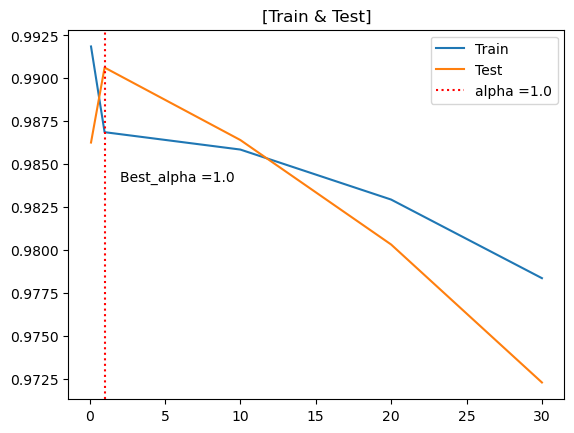

In [198]:
plt.plot(alphas,lasso_score[0], label = 'Train')
plt.plot(alphas,lasso_score[1], label = 'Test')
plt.axvline(best_alpha, color = 'red', linestyle = ':', label = f'alpha ={best_alpha}')
plt.text(best_alpha+1,0.984,f'Best_alpha ={best_alpha}')
plt.legend()
plt.title('[Train & Test]')